In [1]:
import pandas as pd #importing pandas
import matplotlib.pyplot as plt#importing matplot 
import seaborn as sns
import altair as alt

## Italy and South Africa - Increment 1 Continuation

In [2]:
df_it_sa=pd.read_csv('C:\\Users\\golla\\Desktop\\italy_and_south_africa.csv')

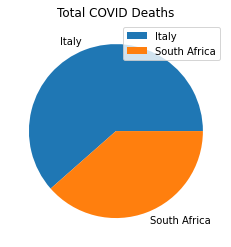

In [3]:
plt.pie(df_it_sa["Total Deaths"],labels=df_it_sa["Country"])
plt.title("Total COVID Deaths")
plt.legend()
plt.show()

In [4]:
base = alt.Chart(df_it_sa).encode(
    theta=alt.Theta("Death percentage", stack=True,title="Death percentage of Italy and South Africa"),
    radius=alt.Radius("Death percentage", scale=alt.Scale(type="sqrt", zero=True, rangeMin=20)),
    color="Country",
)

base.configure_title(fontSize=24)
c1 = base.mark_arc(innerRadius=20, stroke="#fff")
c2 = base.mark_text(radiusOffset=25).encode(text="Death percentage")
c1 + c2

alt.LayerChart(...)

In [5]:
base = alt.Chart(df_it_sa).encode(
    theta=alt.Theta("Total Cases", stack=True,title="Total Covid Cases of Italy and South Africa"),
    radius=alt.Radius("Total Cases", scale=alt.Scale(type="sqrt", zero=True, rangeMin=20)),
    color="Country",
)

base.configure_title(fontSize=24)
c1 = base.mark_arc(innerRadius=20, stroke="#fff")
c2 = base.mark_text(radiusOffset=25).encode(text="Total Cases")
c1 + c2

alt.LayerChart(...)

## World data analysis

In [6]:
df=pd.read_csv("C:\\Users\\golla\\Downloads\\COVID-19 Coronavirus.csv")

In [7]:
#Interactive chart with tool tip
alt.Chart(df).mark_point(size=60).encode(
    x='Population', #x axis
    y='Death percentage', #y axis attribute
    size='Death percentage', #Size attribute
    tooltip=['Country','Continent','Population','Total Cases','Total Deaths'] #data presented when we hover on plot
).interactive() 

alt.Chart(...)

In [8]:
#world map with covid cases
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations = df['ISO 3166-1 alpha-3 CODE'],
    z = df['Total Cases'],
    text = df['Country'], 
    colorscale = 'plasma',
    marker_line_color='black',#color of line dividing countries
    reversescale=True,
    autocolorscale=False,
    marker_line_width=0.5,
    colorbar_title = 'COVID 19 cases in Millions' #color bar title
))

fig.update_layout(
    title_text='Total COVID 19 Cases per country', #title
    title_x = 0.45, #title location with respective to x axis
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)
fig.show()

## In-depth analysis of covid deaths by comparing different parameters of the countries

In [9]:
df_count=pd.read_csv("C:\\Users\\golla\\Desktop\\Sem 2\\data visualization\\project_data\\owid-covid-data.csv")
#reading data

In [10]:
df_count.shape #shape of the dataframe

(162607, 67)

In [11]:
df_finalcount=df_count.loc[df_count['date']=='2022-02-17'] #taking only data  from each country on final date record

In [12]:
df_finalcount.shape

(228, 67)

In [13]:
df_finalcount.dropna(subset=['continent'],inplace=True) #removing data from dataset which is not associated with countries

C:\Users\golla\AppData\Local\Temp/ipykernel_10064/653166364.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
df_visualization=df_finalcount[['continent','location','population','population_density','median_age','aged_65_older','aged_70_older','life_expectancy','female_smokers','male_smokers','total_cases','total_deaths','total_deaths_per_million','cardiovasc_death_rate','diabetes_prevalence','gdp_per_capita','hospital_beds_per_thousand','human_development_index']].copy()
#For this project we are going to work with only some selected attributes of each country

In [15]:
df_visualization.dropna(subset=['continent','location','population','population_density','median_age','aged_65_older','aged_70_older','life_expectancy','female_smokers','male_smokers','total_cases','total_deaths','total_deaths_per_million','cardiovasc_death_rate','diabetes_prevalence','gdp_per_capita','hospital_beds_per_thousand','human_development_index'],inplace=True)
df_visualization.shape #for shape of the data frame

(127, 18)

In [16]:
df_visualization.head() 

continent   location  population  population_density  median_age  \
2184         Europe    Albania   2872934.0             104.871        38.0   
2908         Africa    Algeria  44616626.0              17.348        29.1   
6504  South America  Argentina  45605823.0              16.177        31.9   
7223           Asia    Armenia   2968128.0             102.931        35.7   
9442        Oceania  Australia  25788217.0               3.202        37.9   

      aged_65_older  aged_70_older  life_expectancy  female_smokers  \
2184         13.188          8.643            78.57             7.1   
2908          6.211          3.857            76.88             0.7   
6504         11.198          7.441            76.67            16.2   
7223         11.232          7.571            75.09             1.5   
9442         15.504         10.129            83.44            13.0   

      male_smokers  total_cases  total_deaths  total_deaths_per_million  \
2184          51.2     269301.0        3430.0                  1193.901   
2908          30.4     263369.0        6772.0                   151.782   
6504          27.7    8799858.0      124924.0                  2739.212   
7223          52.1     411878.0        8253.0                  2780.540   
9442          16.5    2990045.0        4833.0                   187.411   

      cardiovasc_death_rate  diabetes_prevalence  gdp_per_capita  \
2184                304.195                10.08       11803.431   
2908                278.364                 6.73       13913.839   
6504                191.032                 5.50       18933.907   
7223                341.010                 7.11        8787.580   
9442                107.791                 5.07       44648.710   

      hospital_beds_per_thousand  human_development_index  
2184                        2.89                    0.795  
2908                        1.90                    0.748  
6504                        5.00                    0.845  
7223                        4.20                    0.776  
9442                        3.84                    0.944

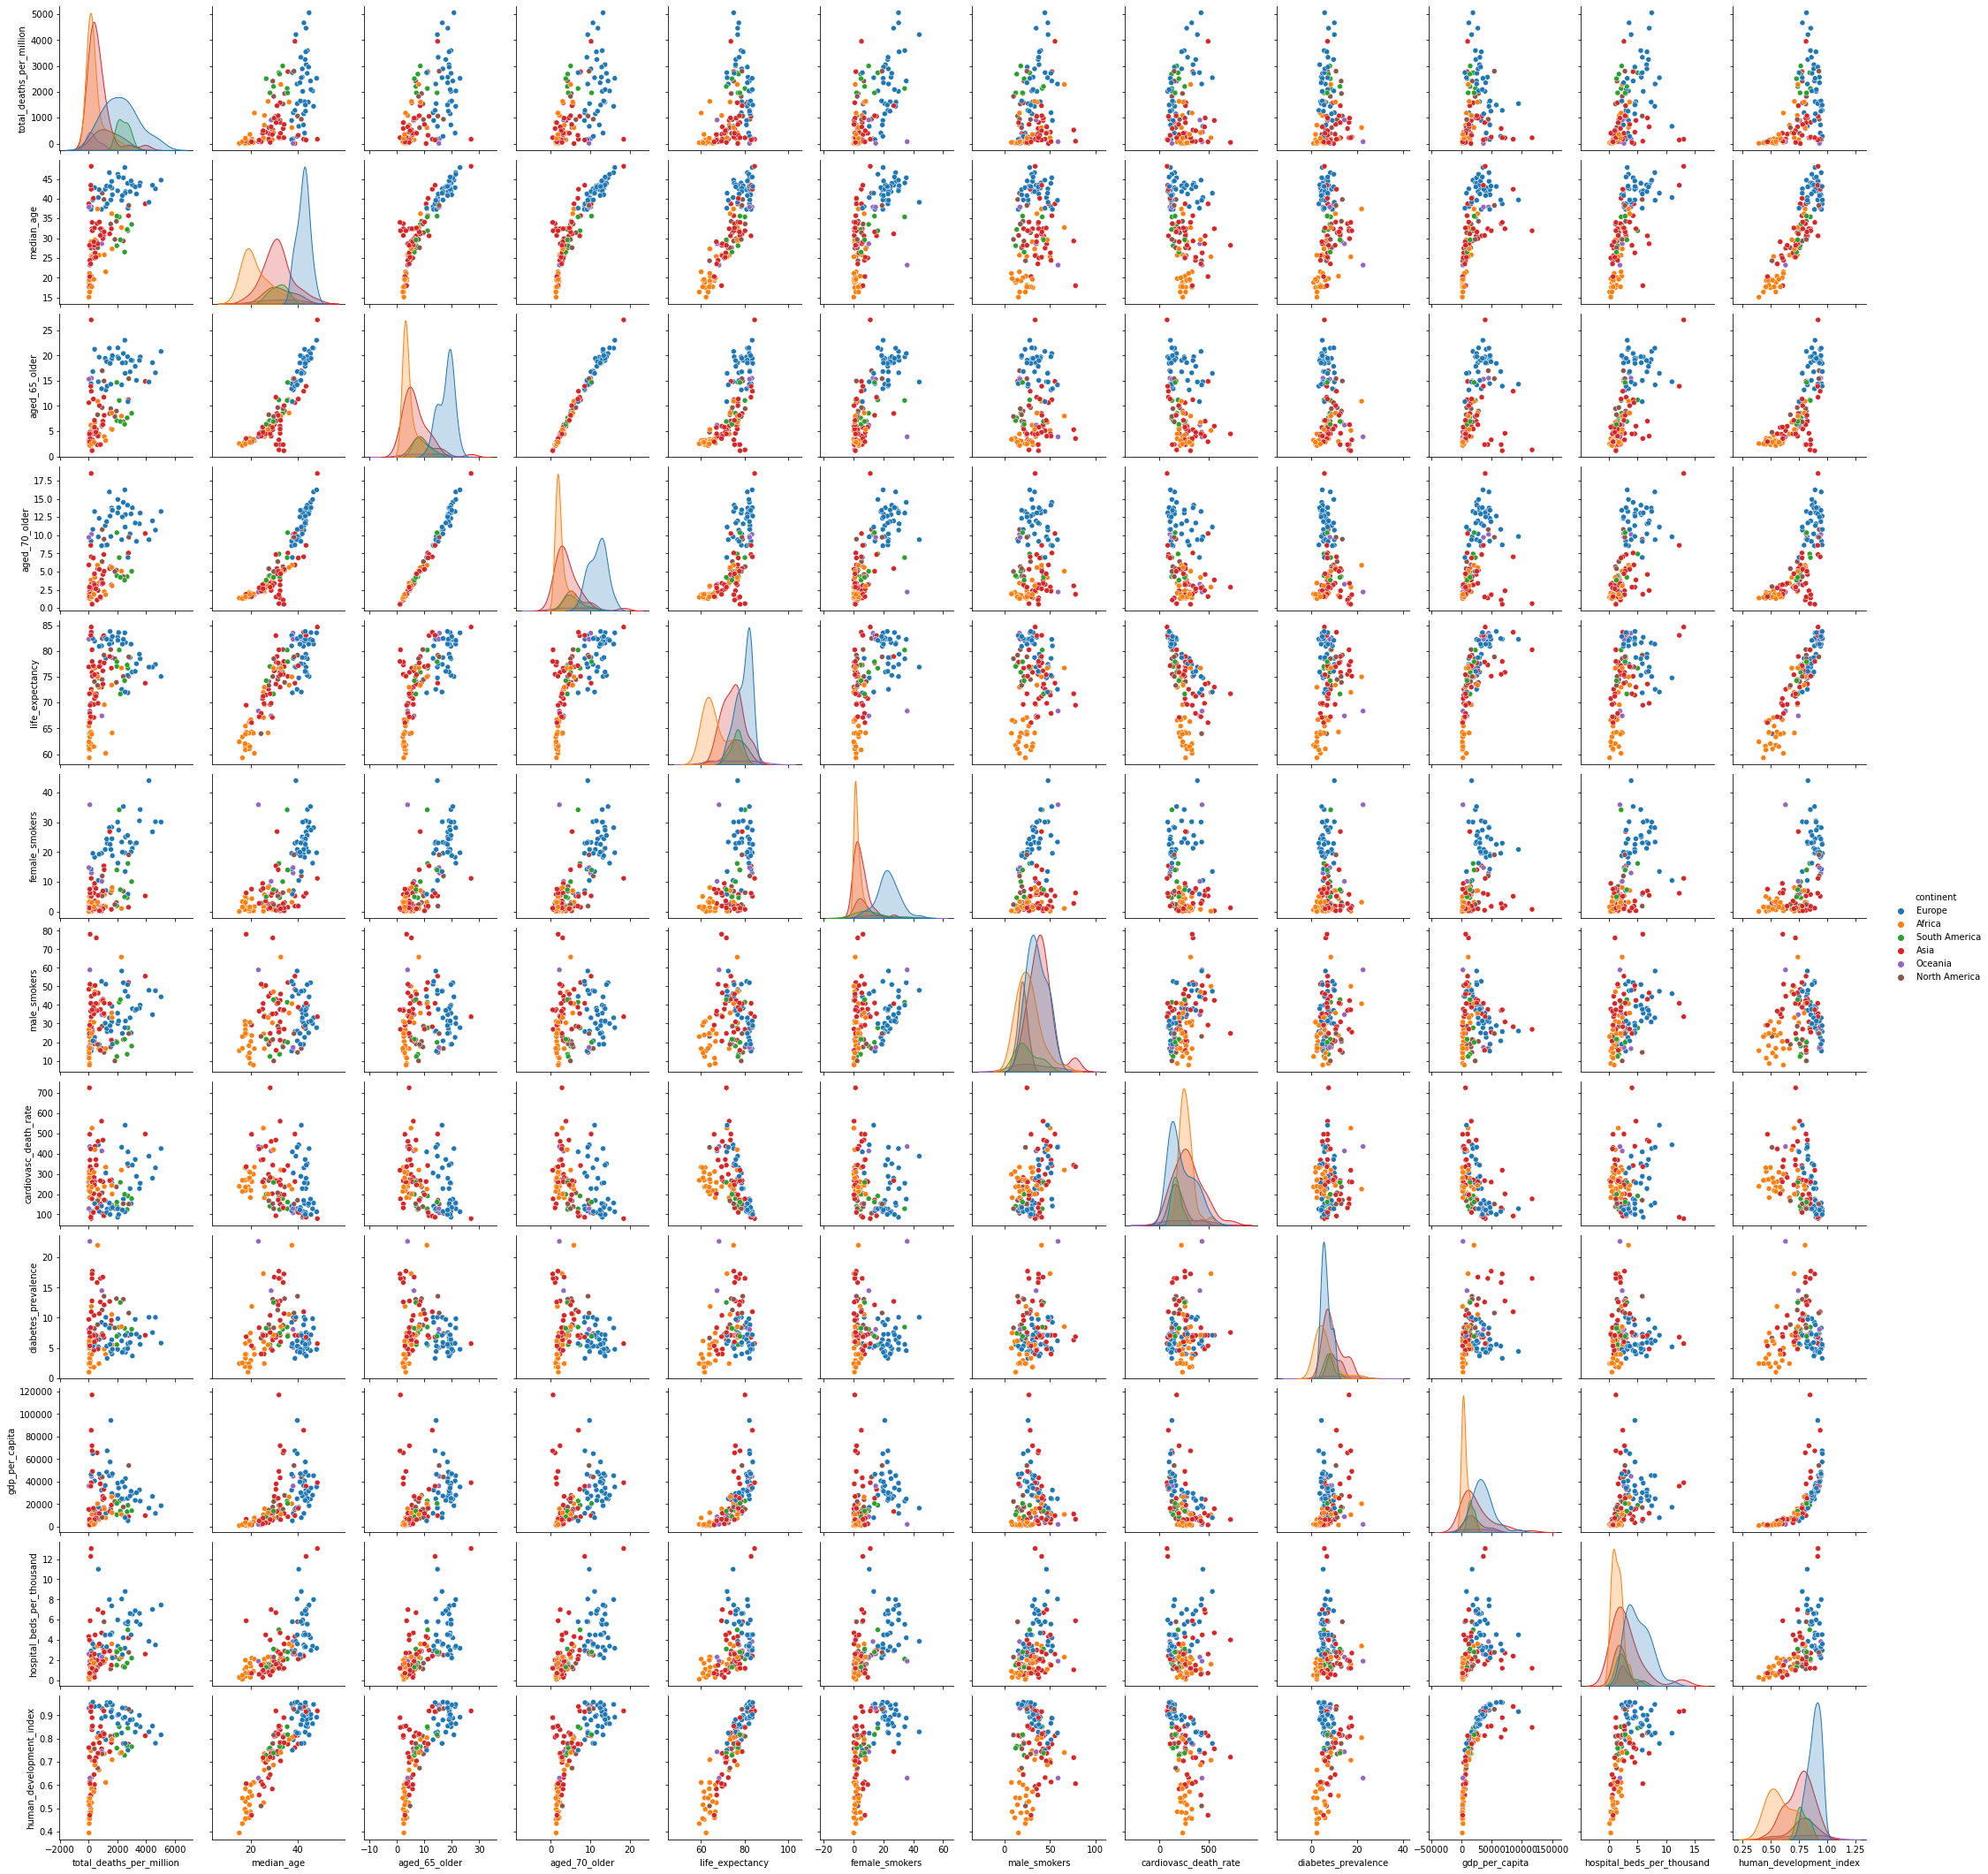

In [26]:
#visualizing pair plot to get a quick overview of relations between attributes
sns.pairplot(
    df_visualization,
    x_vars=['total_deaths_per_million','median_age','aged_65_older','aged_70_older','life_expectancy','female_smokers','male_smokers','cardiovasc_death_rate','diabetes_prevalence','gdp_per_capita','hospital_beds_per_thousand','human_development_index'],
    y_vars=['total_deaths_per_million','median_age','aged_65_older','aged_70_older','life_expectancy','female_smokers','male_smokers','cardiovasc_death_rate','diabetes_prevalence','gdp_per_capita','hospital_beds_per_thousand','human_development_index'],
    hue='continent'
)
plt.savefig('pair_plot_final.png') #saving the pair plot image

##  Analysis of Total Covid deaths and cases

<AxesSubplot:xlabel='total_deaths'>

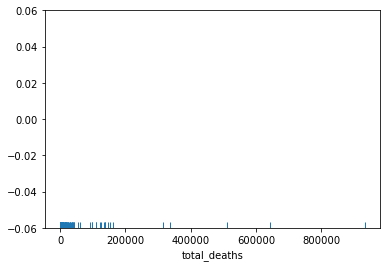

In [17]:
sns.rugplot(df_visualization['total_deaths']) #distribution of covid total deaths data

<AxesSubplot:xlabel='total_deaths', ylabel='Density'>

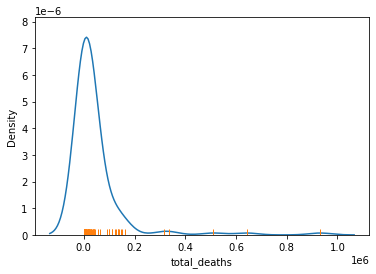

In [18]:
sns.kdeplot(df_visualization['total_deaths'])
sns.rugplot(df_visualization['total_deaths'])

<AxesSubplot:xlabel='total_cases'>

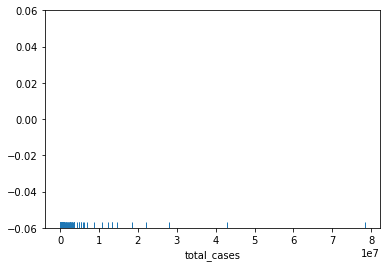

In [19]:
sns.rugplot(df_visualization['total_cases']) #distribution of Covid total_cases data

<AxesSubplot:xlabel='total_cases', ylabel='Density'>

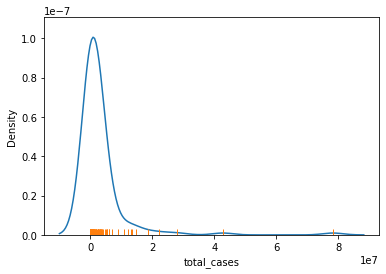

In [20]:
sns.kdeplot(df_visualization['total_cases'])
sns.rugplot(df_visualization['total_cases'])

<AxesSubplot:xlabel='continent', ylabel='total_deaths_per_million'>

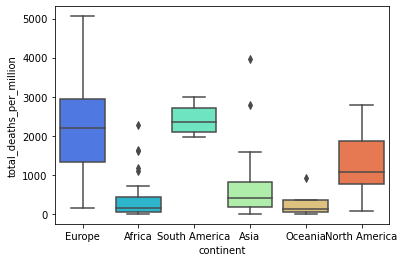

In [21]:
#total covid deaths per million by continent basis
sns.boxplot(x="continent", y="total_deaths_per_million", data=df_visualization,palette='rainbow')

## Age factor

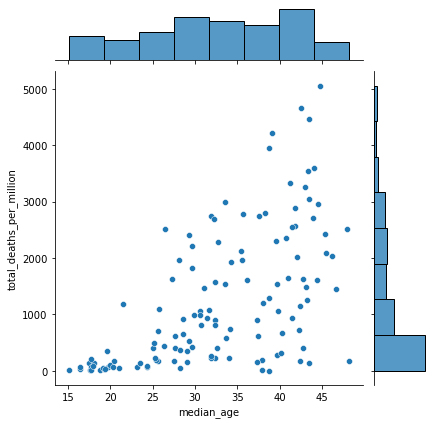

In [22]:
#plot between deaths per million due to covid and the median age of each country
sns.jointplot(x='median_age',y='total_deaths_per_million',data=df_visualization,kind='scatter')

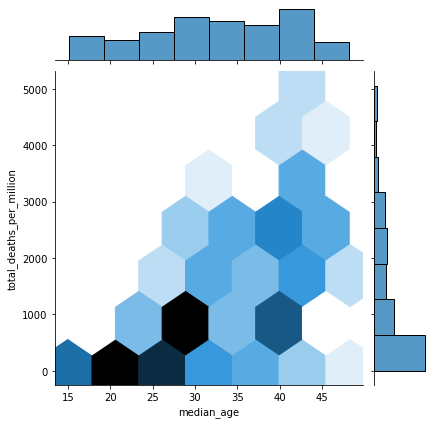

In [23]:
#visualizing it using a hex diagram for quick understandability to the viewer
sns.jointplot(x='median_age',y='total_deaths_per_million',data=df_visualization,kind='hex')

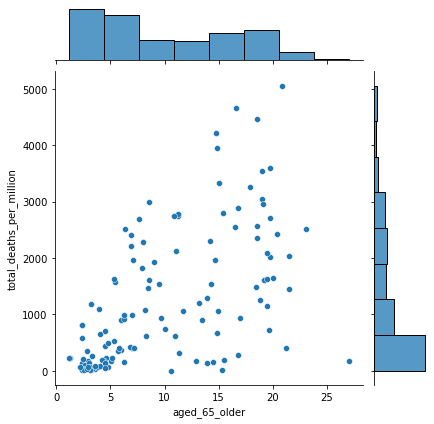

In [25]:
#ploting a scatter plot between percent of population aged more than 65 and covid deaths in that country
sns.jointplot(x='aged_65_older',y='total_deaths_per_million',data=df_visualization,kind='scatter')

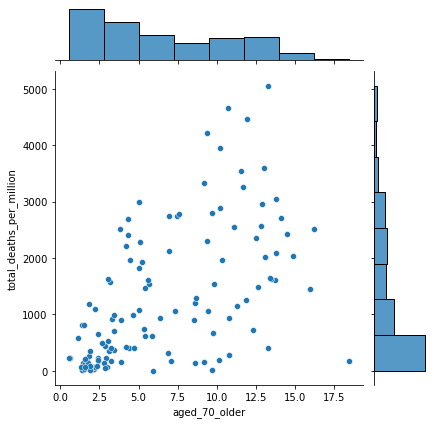

In [27]:
#ploting a scatter plot between percent of population aged more than 70 and covid deaths in that country
sns.jointplot(x='aged_70_older',y='total_deaths_per_million',data=df_visualization,kind='scatter')

## GDP per Capita factor

In [28]:
#creating Income categories based on global standards as per gdp_per_capita data from dataset
def country_category(row):  
    if row['gdp_per_capita'] > 0 and row['gdp_per_capita'] <= 19775.6:
        return 'Lower Income'
    else:
        return 'Higher Income'

#creating column in the data frame    
df_visualization['country_category'] = df_visualization.apply(lambda row: country_category(row), axis=1) 

<AxesSubplot:xlabel='continent', ylabel='total_deaths'>

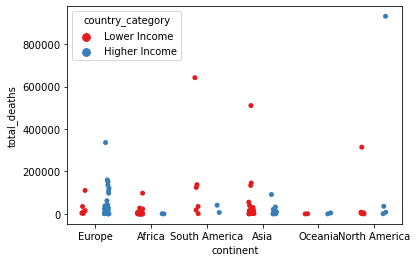

In [29]:
#plotting strip plot for deaths and country income category in each continent
sns.stripplot(x="continent", y="total_deaths",hue='country_category',data=df_visualization, palette="Set1", dodge=True,jitter=True)

<AxesSubplot:xlabel='country_category', ylabel='total_deaths'>

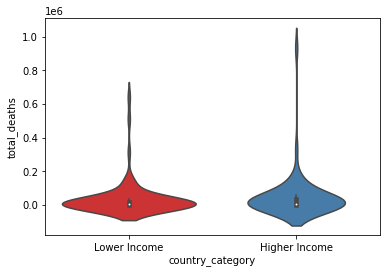

In [30]:
#plotting violin plot between deaths in the country and the country income status
sns.violinplot(x="country_category", y="total_deaths", data=df_visualization,palette='Set1')

<AxesSubplot:xlabel='total_deaths_per_million', ylabel='continent'>

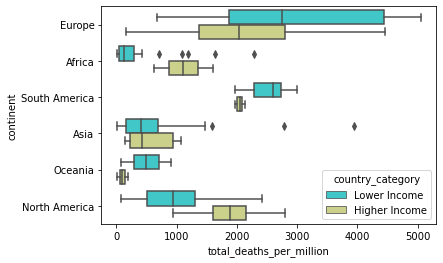

In [31]:
#box plot between continent, total deaths per million with hue as country income status
sns.boxplot(y="continent", x="total_deaths_per_million",hue="country_category",data=df_visualization,palette='rainbow',orient='h')

<AxesSubplot:xlabel='continent', ylabel='total_deaths_per_million'>

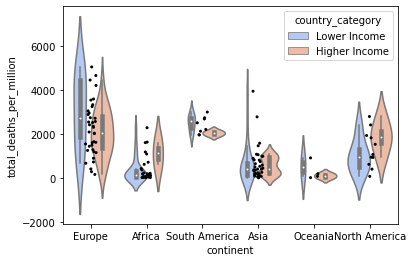

In [32]:
#combining violin and strip plot
sns.violinplot(x="continent", y="total_deaths_per_million", hue="country_category",data=df_visualization,palette='coolwarm')
sns.stripplot(x="continent", y="total_deaths_per_million",data=df_visualization, color="black",size=3, dodge=True)

## Human development Index factor

In [33]:
#creating hdi categories based on global standards as per human development index from dataset
def hdi_category(row):  
    if row['human_development_index'] > 0 and row['human_development_index'] <= 0.7:
        return 'Low'
    else:
        return 'High'

df_visualization['hdi_category'] = df_visualization.apply(lambda row: hdi_category(row), axis=1)

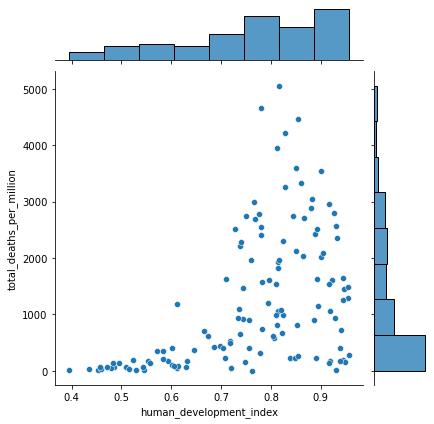

In [34]:
#plotting scatter plot between HDI and covid total death per million values of countries
sns.jointplot(x='human_development_index',y='total_deaths_per_million',data=df_visualization,kind='scatter')

<AxesSubplot:xlabel='continent', ylabel='total_deaths_per_million'>

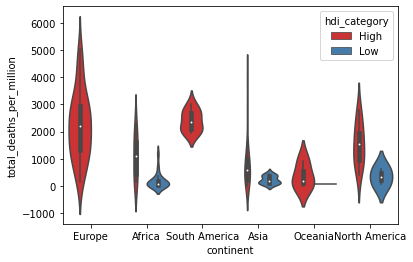

In [35]:
#violin plot between deaths per million, continent and HDI category
sns.violinplot(x="continent", y="total_deaths_per_million", hue="hdi_category",data=df_visualization,palette='Set1')

<AxesSubplot:xlabel='continent', ylabel='total_deaths_per_million'>

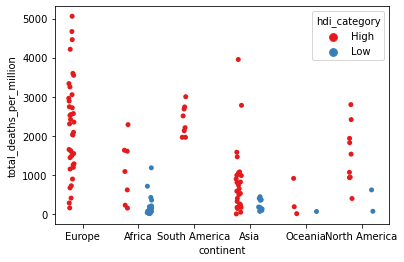

In [36]:
#strip plot for continent, total deaths per million and HDI category
sns.stripplot(x="continent", y="total_deaths_per_million",hue='hdi_category',data=df_visualization, palette="Set1", dodge=True)

<AxesSubplot:xlabel='continent', ylabel='total_deaths_per_million'>

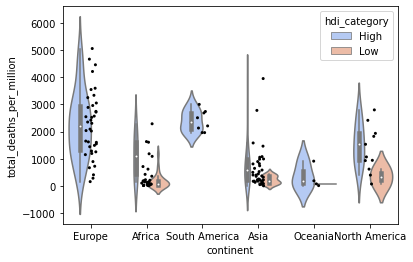

In [37]:
#combining violin and strip plot
sns.violinplot(x="continent", y="total_deaths_per_million", hue="hdi_category",data=df_visualization,palette='coolwarm')
sns.stripplot(x="continent", y="total_deaths_per_million",data=df_visualization, color="black",size=3, dodge=True)

## Exploring other possible factors

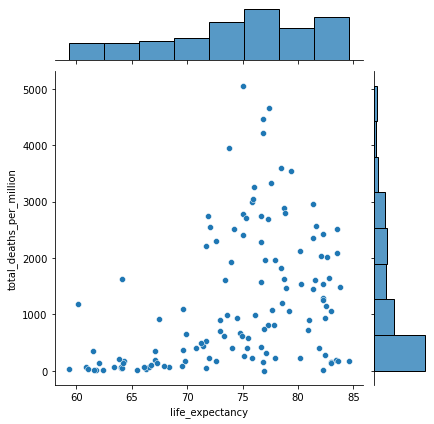

In [38]:
#Ploting scatter plot between life expectancy and total deaths per million value of countries
sns.jointplot(x='life_expectancy',y='total_deaths_per_million',data=df_visualization,kind='scatter')

In [39]:
#categorizing life expectancy
def life_expectancy_category(row):  
    if row['life_expectancy'] > 0 and row['life_expectancy'] <= 65:
        return 'Life expectancy'
    elif row['life_expectancy'] > 65 and row['life_expectancy'] <= 75:
        return 'Medium expectancy'
    else:
        return 'High expectancy'

#creating new column for each country with life expectancy category data in it
df_visualization['life_expectancy_category'] = df_visualization.apply(lambda row: life_expectancy_category(row), axis=1)

<AxesSubplot:xlabel='life_expectancy_category', ylabel='total_deaths_per_million'>

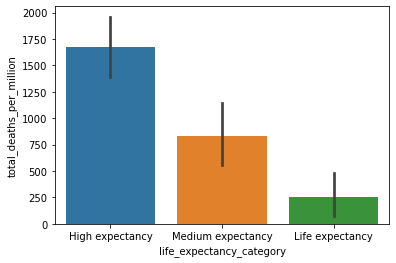

In [40]:
sns.barplot(x='life_expectancy_category',y='total_deaths_per_million',data=df_visualization)

In [41]:
#categorizing population density
def population_density_category(row):  
    if row['population_density'] > 0 and row['population_density'] <= 250:
        return 'Low density'
    elif row['population_density'] > 251 and row['population_density'] <= 500:
        return 'Medium density'
    else:
        return 'High density'
    
    

#creating new column for each country with population density category data in it   
df_visualization['population_density_category'] = df_visualization.apply(lambda row: population_density_category(row), axis=1)

<AxesSubplot:xlabel='population_density_category', ylabel='total_deaths_per_million'>

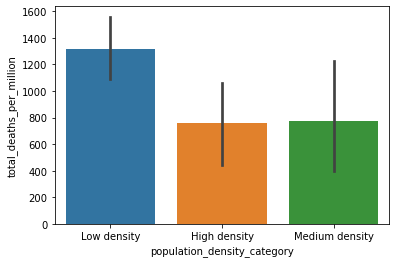

In [42]:
#plotting bar plot between population density and total deaths per million
sns.barplot(x='population_density_category',y='total_deaths_per_million',data=df_visualization)

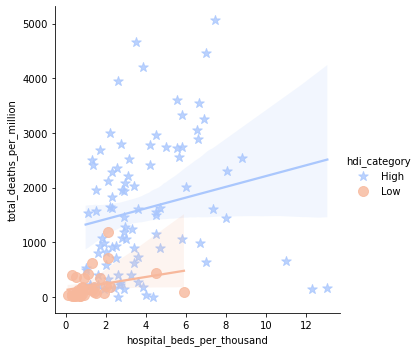

In [43]:
#lm plot between hospital beds per thousand in country and total deaths per million value of the country
#We also separated the points based on Human development index category using shape and color 
sns.lmplot(x='hospital_beds_per_thousand',y='total_deaths_per_million',data=df_visualization,hue='hdi_category',palette='coolwarm',
           markers=['*','o'],scatter_kws={'s':100})

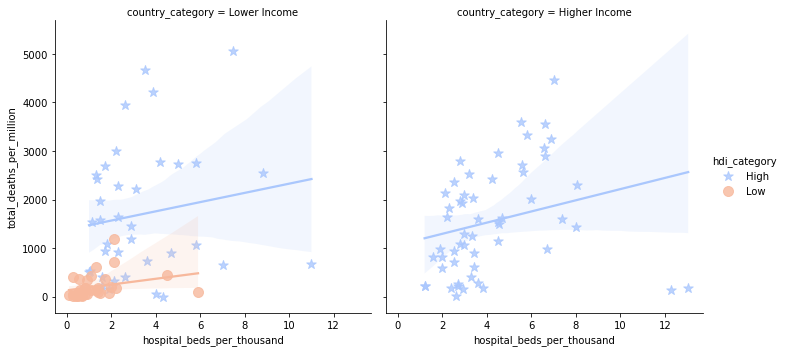

In [44]:
#Added country category attribute to the above graph using grid
sns.lmplot(x="hospital_beds_per_thousand", y="total_deaths_per_million", col="country_category",data=df_visualization, hue='hdi_category',palette='coolwarm',
           markers=['*','o'],scatter_kws={'s':100})